# Comparing Hyperparameters for MNIST Dataset Using DNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

## Preprocessing

In [2]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim)
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


In [4]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

In [5]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]


## The models

### Build the model **1**

Model1 Hyperparameters:

Number of Layers: 1 hidden layer

Hidden Neurons: 64

Activation: relu

Optimizer: SGD with learning rate 0.01

Batch Size: 32

Epochs: up to 20

Early Stopping: Patience = 3

In [6]:
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
optimizer1 = SGD(learning_rate=0.01)
model1.compile(
    optimizer=optimizer1,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stop1 = EarlyStopping(
    monitor='val_loss',
    patience=3,  # stop if val_loss does not improve for 3 epochs
    restore_best_weights=True
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=20,
    callbacks=[early_stop1],
    verbose=1
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7062 - loss: 1.1200 - val_accuracy: 0.8943 - val_loss: 0.3981
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8967 - loss: 0.3790 - val_accuracy: 0.9099 - val_loss: 0.3271
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9088 - loss: 0.3158 - val_accuracy: 0.9172 - val_loss: 0.2950
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9230 - loss: 0.2720 - val_accuracy: 0.9241 - val_loss: 0.2712
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2582 - val_accuracy: 0.9297 - val_loss: 0.2551
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9306 - loss: 0.2412 - val_accuracy: 0.9332 - val_loss: 0.2397
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9364 - loss: 0.2204 - val_accuracy: 0.9368 - val_loss: 0.2293
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9417 - loss: 0.2097 -

In [9]:
_, acc = model1.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 96.11%


### Build the model **2**

Model2 Hyperparameters:

Number of Layers: 2 hidden layers

Hidden Neurons: [128, 64]

Activation: tanh

Optimizer: Adam with learning rate 0.001

Batch Size: 64

Epochs: up to 20

Early Stopping: Patience = 3

In [13]:
model2 = keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=(784,)),
    layers.Dense(64, activation='tanh'),
    layers.Dense(num_classes, activation='softmax')
])

optimizer2 = Adam(learning_rate=0.001)
model2.compile(
    optimizer=optimizer2,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop2 = EarlyStopping(
    monitor='val_accuracy',
    patience=3,  # waits 5 epochs for val_accuracy to improve
    restore_best_weights=True
)

In [14]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=20,
    callbacks=[early_stop2],
    verbose=1
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8539 - loss: 0.5097 - val_accuracy: 0.9438 - val_loss: 0.1981
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9514 - loss: 0.1639 - val_accuracy: 0.9520 - val_loss: 0.1630
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9686 - loss: 0.1031 - val_accuracy: 0.9619 - val_loss: 0.1280
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9772 - loss: 0.0757 - val_accuracy: 0.9684 - val_loss: 0.1076
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9833 - loss: 0.0558 - val_accuracy: 0.9706 - val_loss: 0.0998
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0405 - val_accuracy: 0.9653 - val_loss: 0.1133
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9909 - loss: 0.0325 - val_accuracy: 0.9706 - val_loss: 0.0998
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9935 - loss: 0.0251 - val_accuracy: 0.

In [16]:
_, acc = model2.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 97.32%


### Build the model **3**

Model3 Hyperparameters:

Number of Layers: 3 hidden layers
Hidden Neurons: [256, 128, 64]
Activation: elu
Optimizer: RMSprop with learning rate 0.001
Batch Size: 128
Epochs: up to 20
Early Stopping: Patience = 3

In [17]:
model3 = keras.Sequential([
    layers.Dense(256, activation='elu', input_shape=(784,)),
    layers.Dense(128, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(num_classes, activation='softmax')
])

optimizer3 = RMSprop(learning_rate=0.001)
model3.compile(
    optimizer=optimizer3,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop3 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [18]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=20,
    callbacks=[early_stop3],
    verbose=1
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8477 - loss: 0.4966 - val_accuracy: 0.9435 - val_loss: 0.1849
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9554 - loss: 0.1461 - val_accuracy: 0.9582 - val_loss: 0.1390
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.0976 - val_accuracy: 0.9647 - val_loss: 0.1114
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0719 - val_accuracy: 0.9709 - val_loss: 0.1040
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0567 - val_accuracy: 0.9719 - val_loss: 0.0933
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0469 - val_accuracy: 0.9770 - val_loss: 0.0869
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0365 - val_accuracy: 0.9612 - val_loss: 0.1357
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.

In [20]:
_, acc = model3.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 97.70%


,Model,Hidden Layers,Neurons per Layer,Activation,Optimizer,Batch Size,Test Accuracy (%)
0,Model 1,1,[64],ReLU,SGD (lr=0.01),32,96.11
1,Model 2,2,"[128, 64]",Tanh,Adam (lr=0.001),64,97.32
2,Model 3,3,"[256, 128, 64]",ELU,RMSprop (lr=0.001),128,97.70


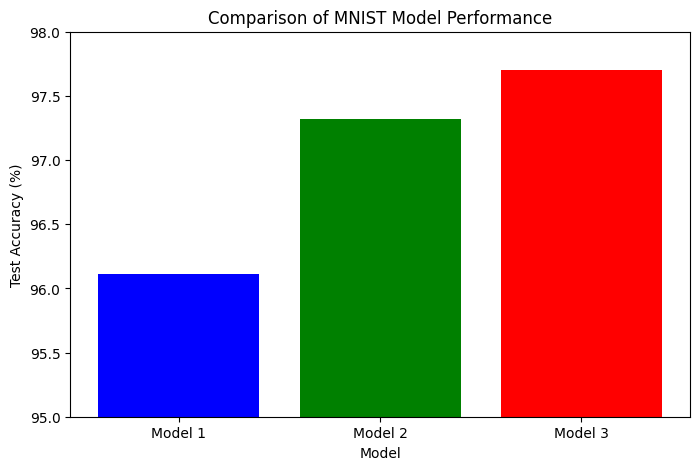

In [22]:
# Model performance summary
results = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Hidden Layers": [1, 2, 3],
    "Neurons per Layer": ["[64]", "[128, 64]", "[256, 128, 64]"],
    "Activation": ["ReLU", "Tanh", "ELU"],
    "Optimizer": ["SGD (lr=0.01)", "Adam (lr=0.001)", "RMSprop (lr=0.001)"],
    "Batch Size": [32, 64, 128],
    "Test Accuracy (%)": [96.11, 97.32, 97.70]
}

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display the table
from IPython.display import display
display(df_results)

# Optional: Plot the accuracies for visual comparison
plt.figure(figsize=(8,5))
plt.bar(df_results["Model"], df_results["Test Accuracy (%)"], color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Test Accuracy (%)")
plt.title("Comparison of MNIST Model Performance")
plt.ylim(95, 98)  # Adjust y-axis for better visualization
plt.show()

**Key Observations**


*   Adding more layers and neurons improved accuracy.
*   Tanh and ELU activations performed better than ReLU in this case.
*   Adam and RMSprop optimizers outperformed SGD.
*   Larger batch sizes (128 in Model 3) didn’t hurt performance.
*   Early stopping worked well to prevent overfitting.